## Data Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/finalTrain.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [4]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

## Data Cleaning

In [5]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean())
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(0)
df['Time_Orderd'] = df['Time_Orderd'].fillna(0)

In [6]:
df['Weather_conditions'].value_counts()

Weather_conditions
Fog           7653
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: count, dtype: int64

In [7]:
df['Weather_conditions'] = df['Weather_conditions'].fillna('Fog')

In [8]:
df['Weather_conditions'].isnull().sum()

0

In [9]:
df['Road_traffic_density'].value_counts()

Road_traffic_density
Low       15476
Jam       14139
Medium    10945
High       4423
Name: count, dtype: int64

In [10]:
df['Road_traffic_density'] = df['Road_traffic_density'].fillna('Low')

In [11]:
df['multiple_deliveries'].value_counts()

multiple_deliveries
1.0    28151
0.0    14094
2.0     1985
3.0      361
Name: count, dtype: int64

In [12]:
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(1.0)

In [13]:
df['Festival'].value_counts()

Festival
No     44460
Yes      896
Name: count, dtype: int64

In [14]:
df['Festival'] = df['Festival'].fillna('No')

In [15]:
df['City'].value_counts()

City
Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: count, dtype: int64

In [16]:
df['City'] = df['City'].fillna('Metropolitian')

In [17]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [18]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [19]:
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']

print(f'Numerical columns: {numerical_columns}')
print(f'Categorical columns: {categorical_columns}')

Numerical columns: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')
Categorical columns: Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [20]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000
mean,29.566911,4.439819,17.017948,70.229684,17.465480,70.844161,1.023385,0.750197,26.293963
std,5.695578,0.984127,8.185674,22.885575,7.335562,21.120578,0.839055,0.567465,9.384298
min,15.000000,0.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,29.566911,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [21]:
# drop unnecessary columns
df.drop('ID', axis=1, inplace=True)
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [22]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")

In [23]:
df['Order_Day'] = df['Order_Date'].dt.day
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Year'] = df['Order_Date'].dt.year

df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Day,Order_Month,Order_Year
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2,2022
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2,2022
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,...,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3,2022
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2,2022
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,...,1,Snack,scooter,1.0,No,Metropolitian,41,14,2,2022


In [24]:
df.drop('Order_Date', axis=1, inplace=True)

In [25]:
df['Time_Orderd_Hour'] = df['Time_Orderd'].str.split(':').str[0]
df['Time_Orderd_Min'] = df['Time_Orderd'].str.split(':').str[1]
df.drop('Time_Orderd', axis=1, inplace=True)
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Order_picked,Weather_conditions,Road_traffic_density,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Day,Order_Month,Order_Year,Time_Orderd_Hour,Time_Orderd_Min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,22:10,Fog,Jam,...,motorcycle,3.0,No,Metropolitian,46,12,2,2022,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,15:05,Stormy,High,...,motorcycle,1.0,No,Metropolitian,23,13,2,2022,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:40,Sandstorms,Medium,...,scooter,1.0,No,Metropolitian,21,4,3,2022,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:30,Sandstorms,Low,...,motorcycle,0.0,No,Metropolitian,20,13,2,2022,09,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,20:05,Fog,Jam,...,scooter,1.0,No,Metropolitian,41,14,2,2022,19,50


In [26]:
df['Time_Order_picked_Hour'] = df['Time_Order_picked'].str.split(':').str[0]
df['Time_Order_picked_Min'] = df['Time_Order_picked'].str.split(':').str[1]
df.drop('Time_Order_picked', axis=1, inplace=True)
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,...,Festival,City,Time_taken (min),Order_Day,Order_Month,Order_Year,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,...,No,Metropolitian,46,12,2,2022,21,55,22,10
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,...,No,Metropolitian,23,13,2,2022,14,55,15,05
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,...,No,Metropolitian,21,4,3,2022,17,30,17,40
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,...,No,Metropolitian,20,13,2,2022,09,20,09,30
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,...,No,Metropolitian,41,14,2,2022,19,50,20,05


In [27]:
df['City'].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45584 non-null  object 
 1   Delivery_person_Age          45584 non-null  float64
 2   Delivery_person_Ratings      45584 non-null  float64
 3   Restaurant_latitude          45584 non-null  float64
 4   Restaurant_longitude         45584 non-null  float64
 5   Delivery_location_latitude   45584 non-null  float64
 6   Delivery_location_longitude  45584 non-null  float64
 7   Weather_conditions           45584 non-null  object 
 8   Road_traffic_density         45584 non-null  object 
 9   Vehicle_condition            45584 non-null  int64  
 10  Type_of_order                45584 non-null  object 
 11  Type_of_vehicle              45584 non-null  object 
 12  multiple_deliveries          45584 non-null  float64
 13  Festival        

In [29]:
df['Time_Orderd_Hour'] = df['Time_Orderd_Hour'].fillna(0)
df['Time_Orderd_Min'] = df['Time_Orderd_Min'].fillna(0)
df['Time_Order_picked_Min'] = df['Time_Order_picked_Min'].fillna(0)

In [30]:
df['Time_Orderd_Hour'] = df['Time_Orderd_Hour'].astype(float).astype(int)
df['Time_Orderd_Min'] = df['Time_Orderd_Min'].astype(float).astype(int)
df['Time_Order_picked_Hour'] = df['Time_Order_picked_Hour'].astype(float).astype(int)
df['Time_Order_picked_Min'] = df['Time_Order_picked_Min'].astype(float).astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45584 non-null  object 
 1   Delivery_person_Age          45584 non-null  float64
 2   Delivery_person_Ratings      45584 non-null  float64
 3   Restaurant_latitude          45584 non-null  float64
 4   Restaurant_longitude         45584 non-null  float64
 5   Delivery_location_latitude   45584 non-null  float64
 6   Delivery_location_longitude  45584 non-null  float64
 7   Weather_conditions           45584 non-null  object 
 8   Road_traffic_density         45584 non-null  object 
 9   Vehicle_condition            45584 non-null  int64  
 10  Type_of_order                45584 non-null  object 
 11  Type_of_vehicle              45584 non-null  object 
 12  multiple_deliveries          45584 non-null  float64
 13  Festival        

C:\Users\akswn\AppData\Local\Temp\ipykernel_8964\1440831371.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Time_taken (min)', shade=True, color="crimson", lw=2)


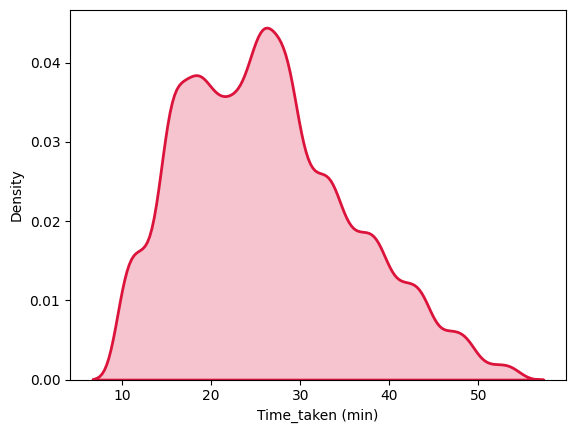

In [32]:
sns.kdeplot(data=df, x='Time_taken (min)', shade=True, color="crimson", lw=2)
plt.show()

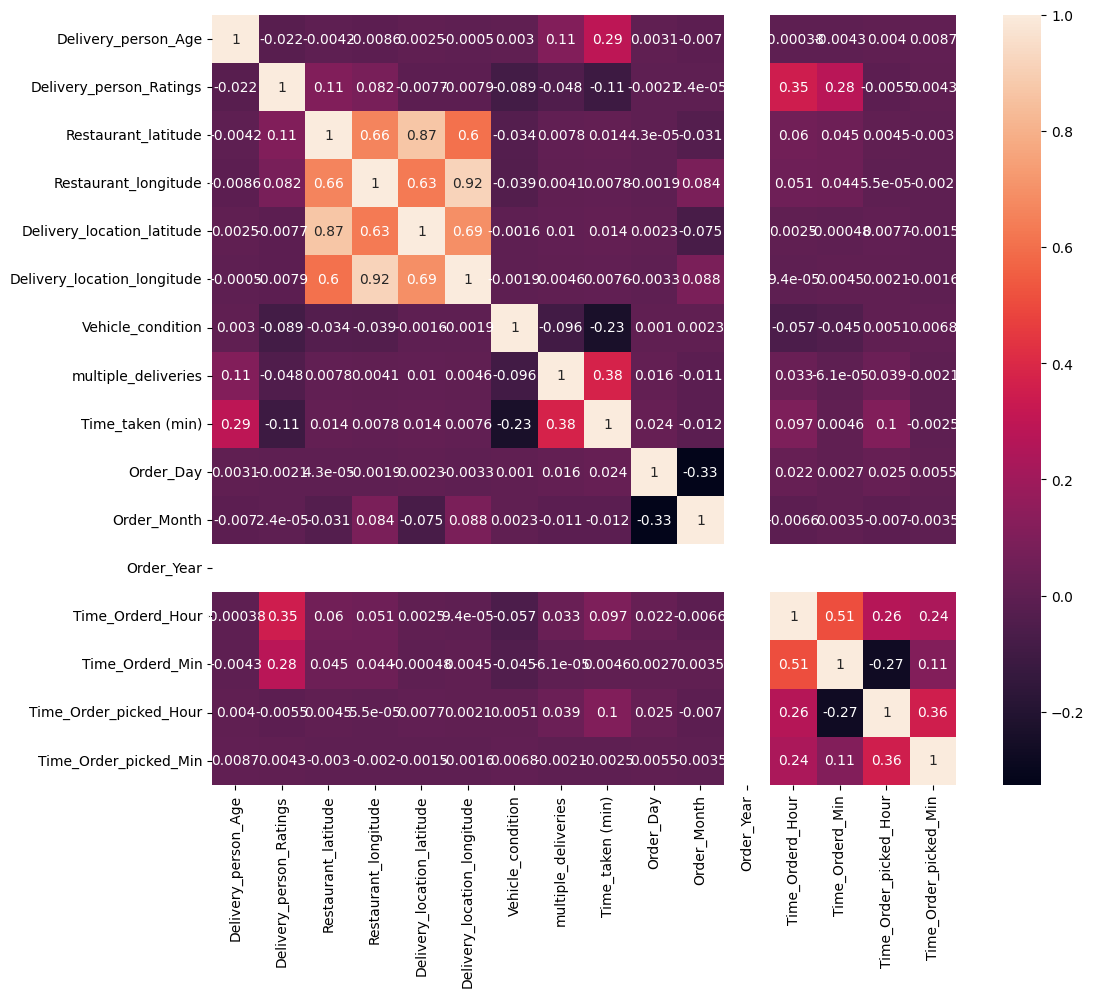

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

<Axes: xlabel='City', ylabel='count'>

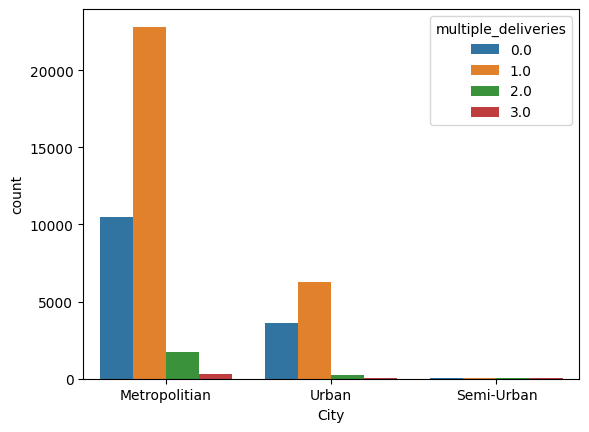

In [42]:
sns.countplot(data=df, x='City', hue='multiple_deliveries')

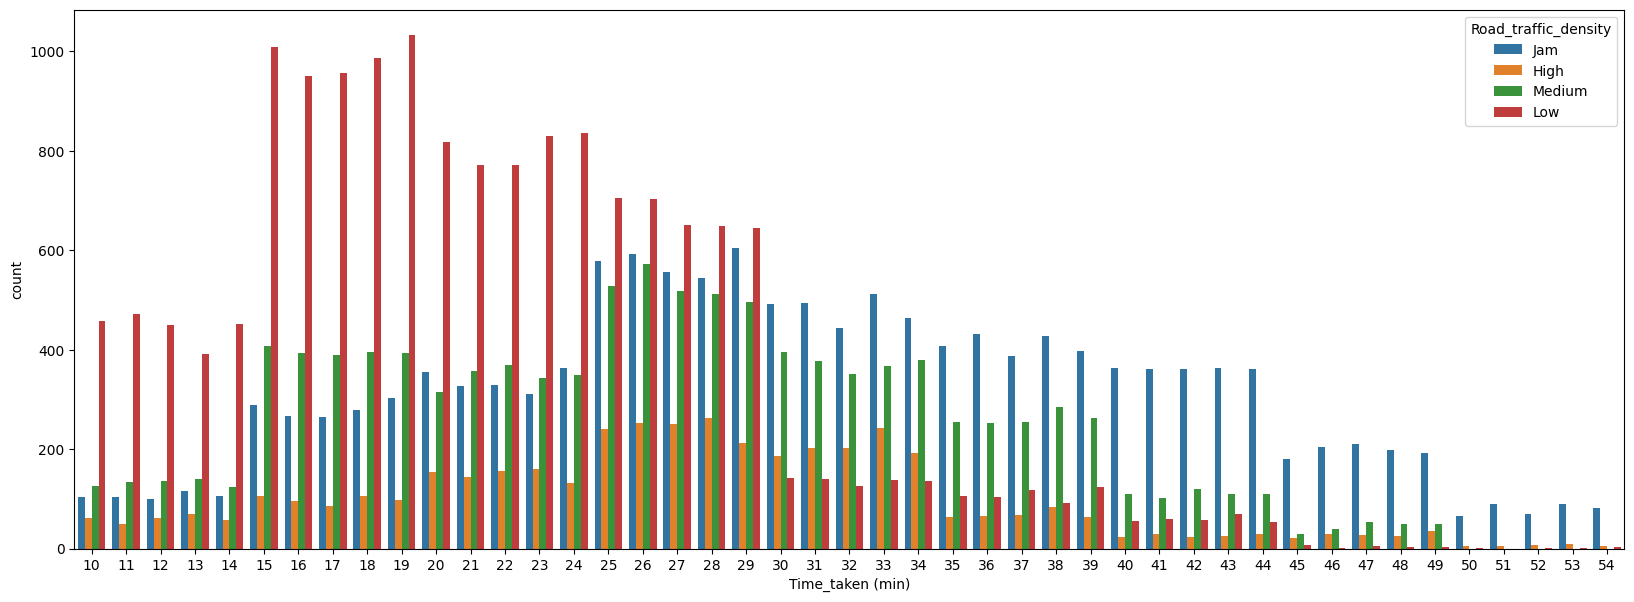

In [43]:
ax, fig = plt.subplots(1, 1, figsize=(20,7))
plt.subplot(111)
sns.countplot(data=df, x='Time_taken (min)', hue='Road_traffic_density')
plt.show()

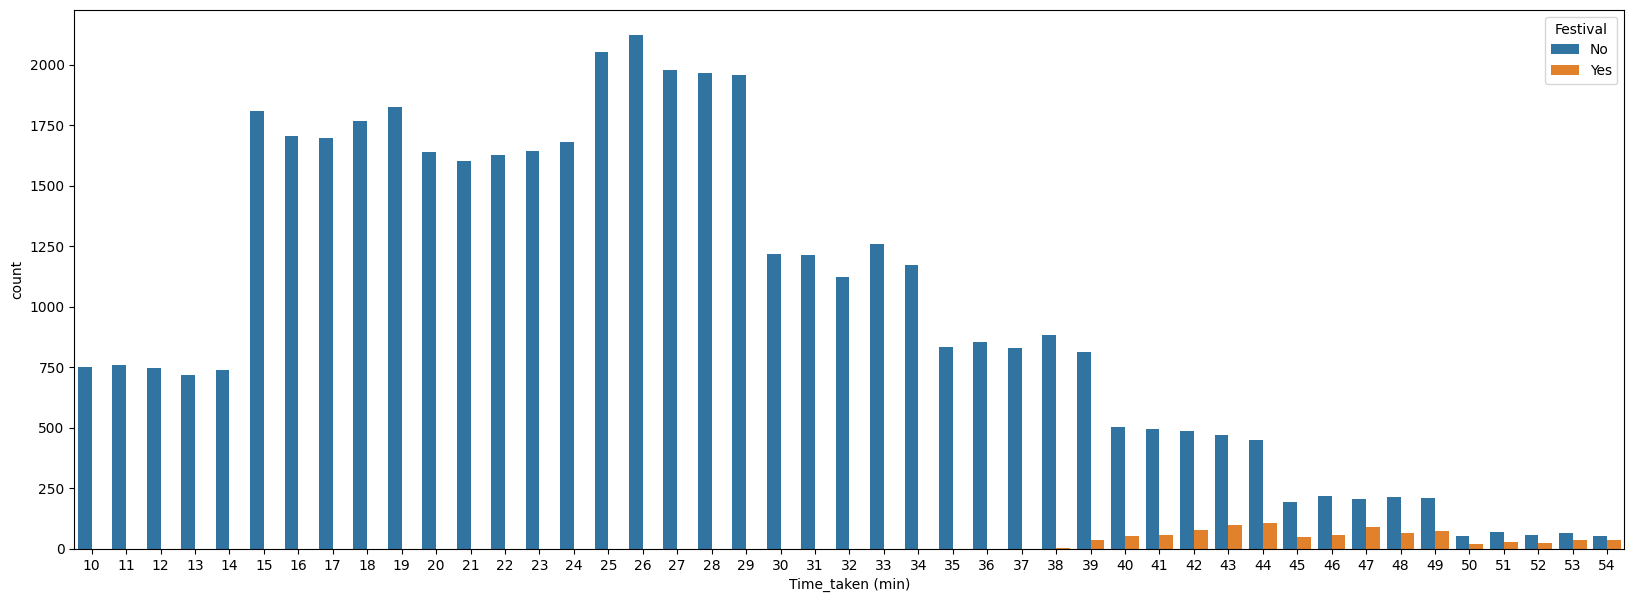

In [44]:
ax, fig = plt.subplots(1, 1, figsize=(20,7))
plt.subplot(111)
sns.countplot(data=df, x='Time_taken (min)', hue='Festival')
plt.show()

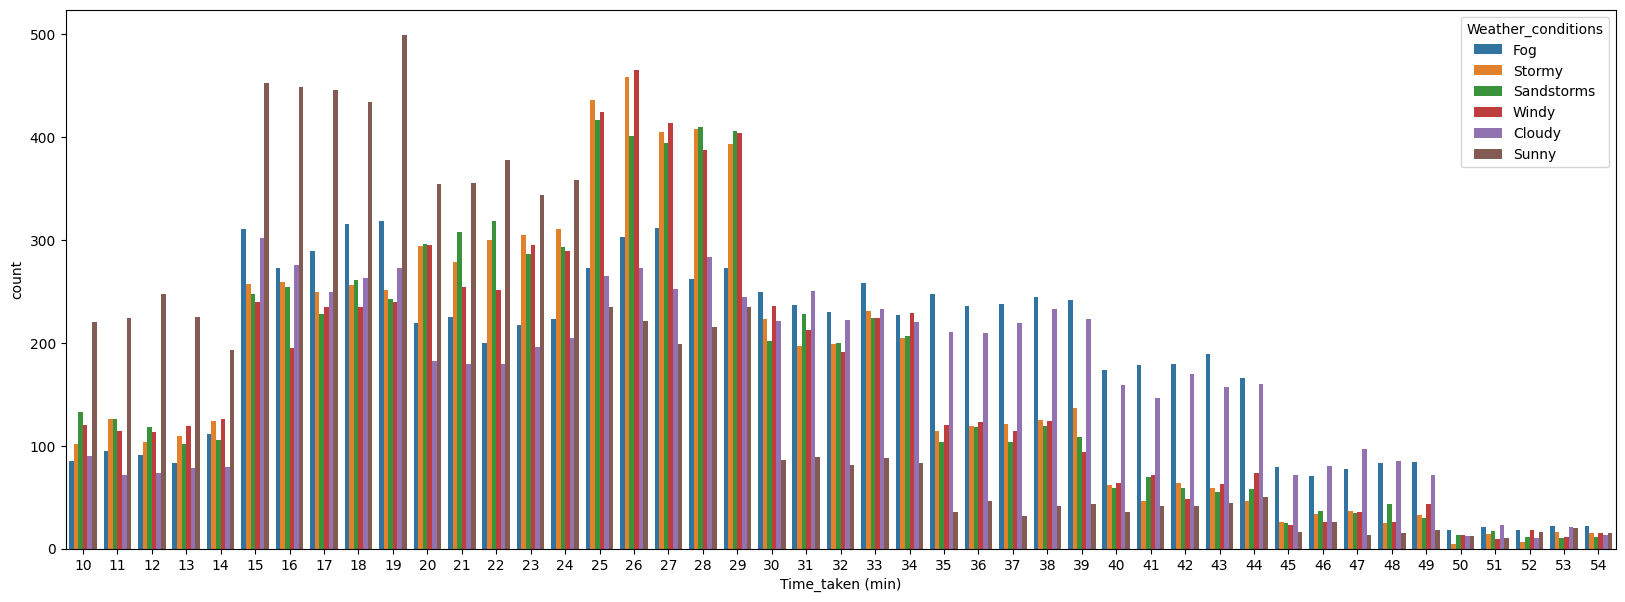

In [45]:
ax, fig = plt.subplots(1, 1, figsize=(20,7))
plt.subplot(111)
sns.countplot(data=df, x='Time_taken (min)', hue='Weather_conditions')
plt.show()

## Model Training

In [46]:
# Handling missing values
from sklearn.impute import SimpleImputer

# Handling Feature Scaling
from sklearn.preprocessing import StandardScaler

# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [47]:
dfCopy = df
dfCopy.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,...,Festival,City,Time_taken (min),Order_Day,Order_Month,Order_Year,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,...,No,Metropolitian,46,12,2,2022,21,55,22,10
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,...,No,Metropolitian,23,13,2,2022,14,55,15,5
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,...,No,Metropolitian,21,4,3,2022,17,30,17,40
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,...,No,Metropolitian,20,13,2,2022,9,20,9,30
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,...,No,Metropolitian,41,14,2,2022,19,50,20,5


In [56]:
dfCopy.drop('Delivery_person_ID', axis=1, inplace=True)
dfCopy.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Time_taken (min),Order_Day,Order_Month,Order_Year,Time_Orderd_Hour,Time_Orderd_Min,Time_Order_picked_Hour,Time_Order_picked_Min
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,No,Metropolitian,46,12,2,2022,21,55,22,10
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,No,Metropolitian,23,13,2,2022,14,55,15,5
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,No,Metropolitian,21,4,3,2022,17,30,17,40
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,No,Metropolitian,20,13,2,2022,9,20,9,30
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,No,Metropolitian,41,14,2,2022,19,50,20,5


In [57]:
# Independent and Dependent features

X = dfCopy.drop(labels=['Time_taken (min)'], axis=1)
Y = dfCopy[['Time_taken (min)']]

In [58]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [59]:
categorical_cols.values

array(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'], dtype=object)

In [60]:
Weather_conditions_categories = ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny']
Road_traffic_density_categories = ['Jam', 'High', 'Medium', 'Low']
Type_of_order_categories = ['Snack', 'Meal', 'Drinks', 'Buffet']
Type_of_vehicle_categories = ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
Festival_categories = ['No', 'Yes']
City_categories = ['Metropolitian', 'Urban', 'Semi-Urban']

In [61]:
# Numerical Pipeline

num_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

# Categorical Pipeline

cat_pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder', OrdinalEncoder(categories=[Weather_conditions_categories, Road_traffic_density_categories, 
                                                      Type_of_order_categories, Type_of_vehicle_categories, Festival_categories, 
                                                      City_categories])),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, numerical_cols),
    ('cat_pipeline', cat_pipeline, categorical_cols)
])

In [62]:
# Train, test, split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [63]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [64]:
X_train.head()

,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Restaurant_latitude,num_pipeline__Restaurant_longitude,num_pipeline__Delivery_location_latitude,num_pipeline__Delivery_location_longitude,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,num_pipeline__Order_Day,num_pipeline__Order_Month,...,num_pipeline__Time_Orderd_Hour,num_pipeline__Time_Orderd_Min,num_pipeline__Time_Order_picked_Hour,num_pipeline__Time_Order_picked_Min,cat_pipeline__Weather_conditions,cat_pipeline__Road_traffic_density,cat_pipeline__Type_of_order,cat_pipeline__Type_of_vehicle,cat_pipeline__Festival,cat_pipeline__City
0,0.957684,0.162345,-2.076627,-3.060210,-2.365197,-3.339881,-0.028178,0.441723,0.713479,0.035210,...,0.228673,-0.780839,0.126634,0.079275,0.325786,0.293488,0.451995,0.754863,-0.141231,-0.537626
1,1.483583,0.264282,0.776439,0.660475,0.810303,0.688195,1.165832,0.441723,-1.006928,0.035210,...,-0.327198,0.089382,-0.471847,0.647386,-0.255372,-0.507865,1.344736,-0.777238,-0.141231,-0.537626
2,1.132984,0.366219,0.050097,0.355796,0.013078,0.362479,1.165832,-1.324947,-0.662846,0.035210,...,0.923513,0.379456,0.874736,0.647386,-0.836530,1.094840,0.451995,2.286964,-0.141231,1.788732
3,-0.444714,0.570092,0.693467,0.247601,0.717835,0.241054,1.165832,-1.324947,0.598785,0.035210,...,0.089705,0.379456,-0.022986,0.647386,-0.836530,0.293488,0.451995,-0.777238,-0.141231,-0.537626
4,1.483583,0.264282,0.671364,0.792455,0.700004,0.833490,-1.222187,0.441723,0.484091,-1.791606,...,0.645577,1.249677,0.575495,1.499552,0.906943,-1.309217,-1.333489,-0.777238,-0.141231,-0.537626


In [71]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [66]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [68]:
print(f"Regression Coefficient = {regression.coef_}")
print(f"Regression Intercept = {regression.intercept_}")

Regression Coefficient = [[ 2.30014074e+00 -1.30517970e+00  2.84466391e-01 -1.42586313e-01
  -1.95241988e-01  7.32623316e-02 -1.89119949e+00  2.15797114e+00
   9.58640920e-02 -4.23269884e-02 -2.22044605e-16  6.53974277e-01
   1.38781699e-02  3.75732776e-01 -2.88886276e-01 -1.18094432e+00
  -3.20324183e+00 -1.86199079e-02 -2.75927135e-02  1.67697694e+00
  -8.18066976e-01]]
Regression Intercept = [26.28936317]


In [69]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    
    return mae, rmse, r2_square

In [72]:
# Training multiple models

models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Elasticnet': ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor()

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make prediction
    y_pred = model.predict(X_test)

    mae, rmse, r2_square = evaluate_model(y_test, y_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print('RMSE: ', rmse)
    print('MAE: ', mae)
    print('R2 SCORE: ', r2_square*100)

    r2_list.append(r2_square)
    print('-'*20)
    print('\n')

LinearRegression
Model Training Performance
RMSE:  6.9587698633080635
MAE:  5.520485104160594
R2 SCORE:  45.79245970468093
--------------------


Lasso
Model Training Performance
RMSE:  7.466518575094072
MAE:  6.038024904417923
R2 SCORE:  37.59332371989181
--------------------


Ridge
Model Training Performance
RMSE:  6.958770972840904
MAE:  5.520490265747403
R2 SCORE:  45.792442418565095
--------------------


Elasticnet
Model Training Performance
RMSE:  7.483477566653581
MAE:  6.071146141528605
R2 SCORE:  37.30950838451231
--------------------


DecisionTree
Model Training Performance
RMSE:  6.6025002576255165
MAE:  4.899385785317344
R2 SCORE:  51.20092307881136
--------------------




C:\Users\akswn\AppData\Local\Temp\ipykernel_8964\1308165478.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForest
Model Training Performance
RMSE:  4.847732287964208
MAE:  3.7782070780930095
R2 SCORE:  73.69295850136052
--------------------




The best model for the given dataset is **Random Forest** with a R2 score of **73.69295850136052**.